In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, f1_score

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import u.item
try:
    movies = pd.read_csv('u.item', sep='|', encoding='ISO-8859-1', header=None,names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url'] + ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
except UnicodeDecodeError:
    print("ISO-8859-1 failed, trying latin1 encoding...")
    movies = pd.read_csv('u.item', sep='|', encoding='latin1', header=None,names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url'] + ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])


In [6]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
movies.columns

Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

<ipython-input-10-2981719eea22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


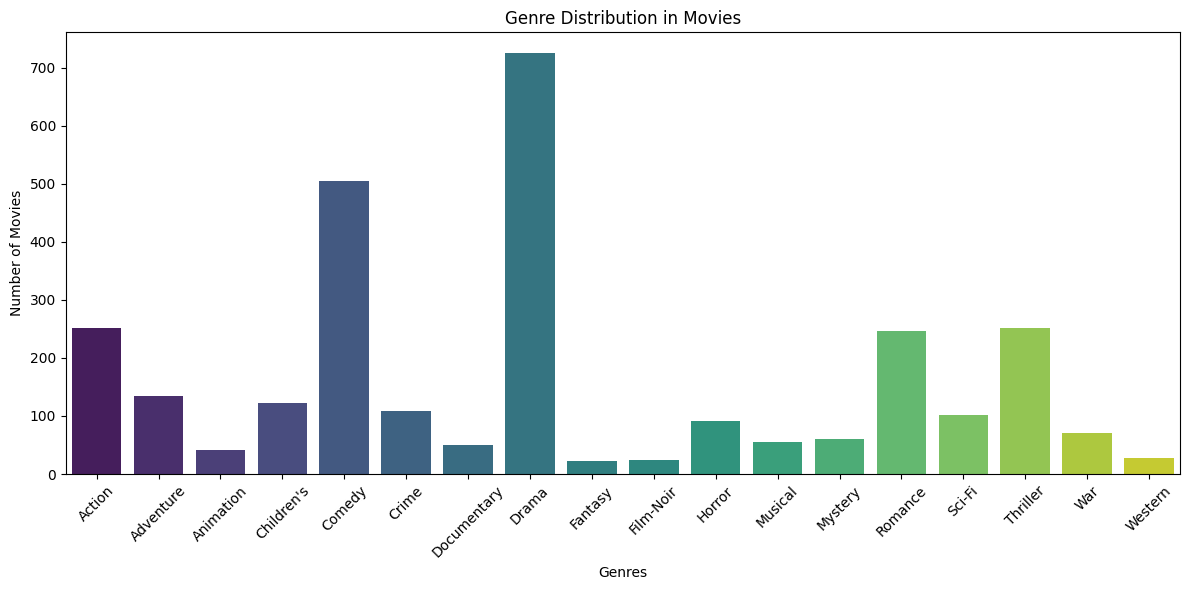

In [10]:
plt.figure(figsize=(12, 6))
genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                 'War', 'Western']
genre_counts = movies[genre_columns].sum()

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Distribution in Movies")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#import u.data
ratings = pd.read_csv('u.data', delimiter='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [ ]:
#import average_polarity for sentiment scores of the movie
review= pd.read_csv('average_polarity.csv')

In [ ]:
review.sample(5)

,Unnamed: 0,movie_id,sentiment_score,Sentiments
1217,1217,1218,0.97914,pos
1042,1042,1043,0.57296,pos
1233,1233,1234,-0.96880,neg
1235,1235,1236,0.15384,pos
1374,1374,1375,0.00000,neu


In [ ]:
#converting sentimets into numerical values pos': 0, 'neg': 1, 'neu': 2
review['sentiment_encoded'] = review['Sentiments'].replace({'pos': 0, 'neg': 1, 'neu': 2})


<ipython-input-16-dfeac6a6d2d7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  review['sentiment_encoded'] = review['Sentiments'].replace({'pos': 0, 'neg': 1, 'neu': 2})


In [ ]:
movies = pd.merge(movies, review[['movie_id', 'sentiment_encoded']], on='movie_id')


In [ ]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_encoded
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
movies.shape

(1682, 25)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
col_drop=col_drop = ['movie_title', 'release_date','video_release_date','imdb_url']
movies_cleaned = movies.drop(columns=col_drop)


In [ ]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   movie_id           1682 non-null   int64
 1   unknown            1682 non-null   int64
 2   Action             1682 non-null   int64
 3   Adventure          1682 non-null   int64
 4   Animation          1682 non-null   int64
 5   Children's         1682 non-null   int64
 6   Comedy             1682 non-null   int64
 7   Crime              1682 non-null   int64
 8   Documentary        1682 non-null   int64
 9   Drama              1682 non-null   int64
 10  Fantasy            1682 non-null   int64
 11  Film-Noir          1682 non-null   int64
 12  Horror             1682 non-null   int64
 13  Musical            1682 non-null   int64
 14  Mystery            1682 non-null   int64
 15  Romance            1682 non-null   int64
 16  Sci-Fi             1682 non-null   int64
 17  Thriller      

In [ ]:
'''
This model is designed for hybrid recommendation system,
 combining collaborative filtering (user and movie embeddings) and content-based methods
  (metadata and text embeddings) to predict a user's  preference for a movie
'''
class HybridRecommendationModel(nn.Module):
    def __init__(self, num_users, num_movies, metadata_dim, text_embedding_dim, embedding_dim=20):
        super(HybridRecommendationModel, self).__init__()
        # Embedding layers for users and movies
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, embedding_dim)

        # Fully connected layers for metadata
        self.metadata_fc = nn.Sequential(
            nn.Linear(metadata_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        # Fully connected layers for text embeddings
        self.text_fc = nn.Sequential(
            nn.Linear(text_embedding_dim, embedding_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        # Calculate combined size dynamically based on the embedding dimensions
        combined_size = embedding_dim * 2 + 128 + embedding_dim  # User, movie, metadata, text
        self.fc = nn.Sequential(
            nn.Linear(combined_size, 64),  # Use dynamic combined_size instead of fixed 188
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, user_ids, movie_ids, metadata, text_embedding):
        user_embed = self.user_embedding(user_ids)
        movie_embed = self.movie_embedding(movie_ids)

        metadata_out = self.metadata_fc(metadata).squeeze(1)  # Fix: Remove extra dimension

        if text_embedding.dim() == 3:  # If extra dimension exists in text embedding
            text_embedding = text_embedding.squeeze(-1)
        text_out = self.text_fc(text_embedding)

       # print(f"user_embed: {user_embed.shape}, movie_embed: {movie_embed.shape}, metadata_out: {metadata_out.shape}, text_out: {text_out.shape}")

        # Concatenate along last dimension
        combined = torch.cat([user_embed, movie_embed, metadata_out, text_out], dim=-1)
        #print(f"combined: {combined.shape}")

        return self.fc(combined)



In [ ]:
class HybridDataset(Dataset):
    def __init__(self, ratings, movies, train=True, split_ratio=0.8):
        self.movies = movies
        self.train = train

        # Split ratings into train/validation sets
        if self.train:
            self.ratings = ratings.sample(frac=split_ratio, random_state=42)
        else:
            self.ratings = ratings.drop(ratings.sample(frac=split_ratio, random_state=42).index)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        rating = self.ratings.iloc[idx]
        user_id = rating['user_id']
        movie_id = rating['movie_id']

        # Extract movie metadata, ensuring no missing values
        movie_metadata = self.movies.loc[self.movies['movie_id'] == movie_id].drop('movie_id', axis=1).values

        # Ensure sentiment score exists
        sentiment_score = self.movies.loc[self.movies['movie_id'] == movie_id]['sentiment_encoded'].values
        if sentiment_score.size == 0:
            sentiment_score = np.array([0])  # Default value if missing

        return (
            torch.tensor(user_id),
            torch.tensor(movie_id),
            torch.tensor(movie_metadata, dtype=torch.float32),
            torch.tensor(sentiment_score, dtype=torch.float32),
            torch.tensor(rating['rating'], dtype=torch.float32)
        )


In [ ]:
# Split ratings data into train and validation
train_dataset = HybridDataset(ratings, movies_cleaned, train=True)
validation_dataset = HybridDataset(ratings, movies_cleaned, train=False)

# DataLoader for batch processing
train_data = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_data = DataLoader(validation_dataset, batch_size=64, shuffle=False)


In [ ]:
print(f"Number of samples in validation dataset: {len(validation_dataset)}")
print(f"Number of samples in validation data: {len(validation_data)}")

Number of samples in validation dataset: 20000
Number of samples in validation data: 313


In [ ]:
# Ensure zero-based indexing for user and movie IDs
ratings['user_id'] = ratings['user_id'] - 1
ratings['movie_id'] = ratings['movie_id'] - 1

In [ ]:
print("User ID Range:", ratings['user_id'].min(), ratings['user_id'].max())
print("Movie ID Range:", ratings['movie_id'].min(), ratings['movie_id'].max())

User ID Range: 0 942
Movie ID Range: 0 1681


In [ ]:
def train_model(model, train_data, optimizer, criterion, num_users, num_movies, epochs=20):
    """
    Train the model on the training data.
    """
    for epoch in range(epochs):
        model.train()

        epoch_bar = tqdm(train_data, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")


        for user_ids, movie_ids, metadata, text_embedding, ratings in epoch_bar:
            # Ensure IDs fit embedding ranges
            assert user_ids.max() < num_users, f"User ID {user_ids.max()} exceeds num_users {num_users}"
            assert movie_ids.max() < num_movies, f"Movie ID {movie_ids.max()} exceeds num_movies {num_movies}"

            optimizer.zero_grad()
            outputs = model(user_ids, movie_ids, metadata, text_embedding)
            loss = criterion(outputs.squeeze(-1), ratings)
            loss.backward()
            optimizer.step()
    return model


In [ ]:
def validate_model(model, validation_data):
    """
    Validate the model on the validation data and collect predictions and true ratings.
    """
    model.eval()
    predictions, true_ratings = [], []

    with torch.no_grad():
        for user_ids, movie_ids, metadata, text_embedding, ratings in validation_data:
            outputs = model(user_ids, movie_ids, metadata, text_embedding)
            predictions.append(outputs.detach().numpy())
            true_ratings.append(ratings.numpy())

    predictions = np.concatenate(predictions)
    true_ratings = np.concatenate(true_ratings)
    return predictions, true_ratings


def calculate_rmse(predictions, true_ratings):
    """
    Calculate RMSE from predictions and true ratings.
    """
    return mean_squared_error(true_ratings, predictions, squared=False)


def run_hyperparameter_tuning(model_class, latent_sizes, train_data, validation_data, num_users, num_movies, metadata_dim, text_embedding_dim, epochs=20, lr=0.001):
    """
    Run hyperparameter tuning for different latent sizes.
    """
    rmse_values = []
    best_model = None
    best_rmse = float('inf')

    for latent_size in latent_sizes:
        print("latent_size:",latent_size)
        # Initialize the model, optimizer, and criterion
        model = model_class(num_users, num_movies, metadata_dim, text_embedding_dim, embedding_dim=latent_size)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        # Train the model
        model = train_model(model, train_data, optimizer, criterion, num_users, num_movies, epochs)

        # Validate the model
        predictions, true_ratings = validate_model(model, validation_data)

        # Calculate RMSE
        rmse = calculate_rmse(predictions, true_ratings)
        #print(rmse)
        rmse_values.append(rmse)

        # Update the best model
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

    return rmse_values,best_model


# Running the hyperparameter tuning
latent_sizes = [20, 30, 40, 50]
num_users = 944
num_movies = 1684
metadata_dim = 20
text_embedding_dim = 1

rmse_nn,best_model = run_hyperparameter_tuning(
    HybridRecommendationModel,
    latent_sizes,
    train_data,
    validation_data,
    num_users,
    num_movies,
    metadata_dim,
    text_embedding_dim
)

latent_size: 20


Epoch 20/20: 100%|██████████| 1250/1250 [01:58<00:00, 10.52batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


latent_size: 30


Epoch 20/20: 100%|██████████| 1250/1250 [01:58<00:00, 10.51batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


latent_size: 40


Epoch 20/20: 100%|██████████| 1250/1250 [01:57<00:00, 10.65batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


latent_size: 50


Epoch 20/20: 100%|██████████| 1250/1250 [01:58<00:00, 10.57batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


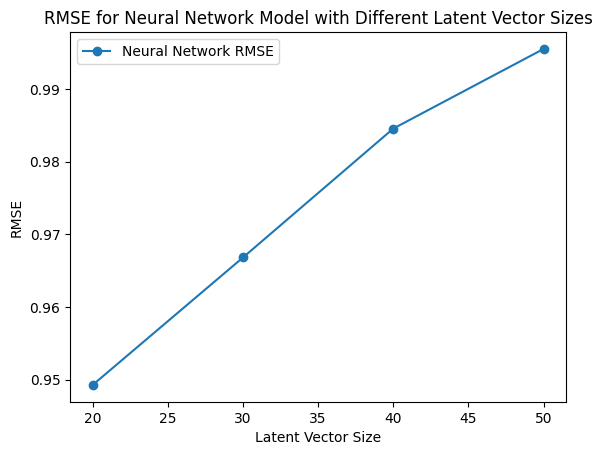

In [ ]:
plt.plot(latent_sizes, rmse_nn, label='Neural Network RMSE', marker='o')
plt.xlabel('Latent Vector Size')
plt.ylabel('RMSE')
plt.title('RMSE for Neural Network Model with Different Latent Vector Sizes')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, test_data, top_k=[10, 20]):
    model.eval()
    predictions, true_ratings = [], []
    user_ids, movie_ids = [], []

    # Collect predictions and true ratings
    for batch in test_data:
        user_batch, movie_batch, metadata, text_embedding, ratings = batch
        outputs = model(user_batch, movie_batch, metadata, text_embedding)
        predictions.extend(outputs.detach().numpy())
        true_ratings.extend(ratings.numpy())
        user_ids.extend(user_batch.numpy())
        movie_ids.extend(movie_batch.numpy())

    # Convert to arrays
    predictions = np.array(predictions)
    true_ratings = np.array(true_ratings)
    user_ids = np.array(user_ids)
    movie_ids = np.array(movie_ids)

    # RMSE and MAE
    rmse = np.sqrt(mean_squared_error(true_ratings, predictions))
    mae = mean_absolute_error(true_ratings, predictions)

    # Create user-item matrices
    num_users = np.max(user_ids) + 1
    num_movies = np.max(movie_ids) + 1
    prediction_matrix = np.zeros((num_users, num_movies))
    true_ratings_matrix = np.zeros((num_users, num_movies))

    for u, m, p, t in zip(user_ids, movie_ids, predictions, true_ratings):
        prediction_matrix[u, m] = p.item()
        true_ratings_matrix[u, m] = t.item()

    # Precision, Recall, F1 for top-k recommendations
    precision, recall, f1 = [], [], []

    for k in top_k:
        prec_k, rec_k, f1_k = 0, 0, 0
        valid_users = 0

        for user in range(num_users):
            # Get true and predicted top-k items for the user
            user_true_ratings = true_ratings_matrix[user, :]
            user_predictions = prediction_matrix[user, :]

            # Find indices of top-k predicted and actual items
            top_k_preds = np.argsort(user_predictions)[-k:]
            top_k_true = np.argsort(user_true_ratings)[-k:]

            # Convert to binary relevance (relevant if true rating > 0)
            true_relevant = set(np.where(user_true_ratings > 0)[0])
            pred_relevant = set(top_k_preds)

            # Calculate precision, recall, and F1
            if len(true_relevant) > 0:  # Only evaluate if the user has true relevant items
                valid_users += 1
                intersection = len(true_relevant & pred_relevant)
                prec_k += intersection / len(pred_relevant)
                rec_k += intersection / len(true_relevant)

        # Avoid division by zero
        if valid_users > 0:
            prec_k /= valid_users
            rec_k /= valid_users
            f1_k = 2 * (prec_k * rec_k) / (prec_k + rec_k + 1e-10)  # Add small epsilon to avoid division by zero

        precision.append(prec_k)
        recall.append(rec_k)
        f1.append(f1_k)

    return rmse, mae, precision, recall, f1




Test RMSE: 0.9492879509925842, Test MAE: 0.7510139346122742
Precision (Top-10, Top-20): [0.8390425531914887, 0.6542021276595746]
Recall (Top-10, Top-20): [0.6722056231451963, 0.8390669784700049]
F1-Score (Top-10, Top-20): [0.7464149583204487, 0.735191534163535]


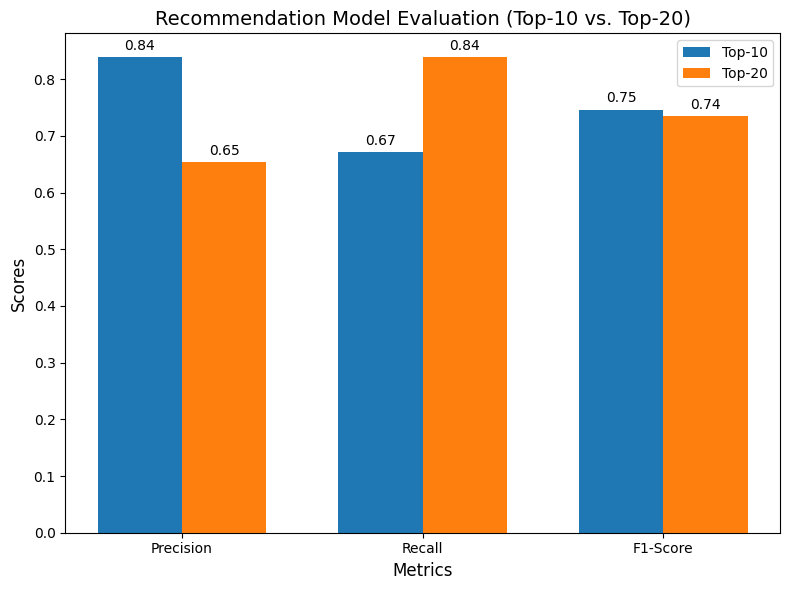

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the following values are obtained from evaluate_model()
if best_model is not None:
    test_rmse, test_mae, precision, recall, f1 = evaluate_model(best_model, validation_data, top_k=[10, 20])

    print(f"Test RMSE: {test_rmse}, Test MAE: {test_mae}")
    print(f"Precision (Top-10, Top-20): {precision}")
    print(f"Recall (Top-10, Top-20): {recall}")
    print(f"F1-Score (Top-10, Top-20): {f1}")

    # Metrics for plotting
    metrics = ["Precision", "Recall", "F1-Score"]
    top_k_values = [10, 20]
    values = [precision, recall, f1]

    # Convert values to a NumPy array for easier manipulation
    values = np.array(values)  # Shape: (3, 2) -> [Precision, Recall, F1] x [Top-10, Top-20]

    # Create a bar chart
    x = np.arange(len(metrics))  # [0, 1, 2] for Precision, Recall, F1-Score
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(8, 6))
    bars1 = ax.bar(x - width / 2, values[:, 0], width, label="Top-10")
    bars2 = ax.bar(x + width / 2, values[:, 1], width, label="Top-20")

    # Add labels and titles
    ax.set_xlabel("Metrics", fontsize=12)
    ax.set_ylabel("Scores", fontsize=12)
    ax.set_title("Recommendation Model Evaluation (Top-10 vs. Top-20)", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add data labels on top of each bar
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.2f}",
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset for the label
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()


In [ ]:
def recommend_movies(model, user_id, num_movies, top_k=20):
    """
    Recommend movies to a user based on the trained model.
    """
    model.eval()

    movie_ids = np.arange(num_movies)

    # Convert numpy arrays to PyTorch tensors
    user_ids = torch.full((len(movie_ids),), user_id, dtype=torch.long)
    movie_ids = torch.tensor(movie_ids, dtype=torch.long)

    # Dummy metadata and text embeddings (replace with actual if available)
    metadata = torch.zeros((len(movie_ids), metadata_dim))
    text_embedding = torch.zeros((len(movie_ids), text_embedding_dim))

    with torch.no_grad():
        predictions = model(user_ids, movie_ids, metadata, text_embedding)


    #print(f"Raw predictions for user {user_id}: {predictions}")

    # Get the top-k indices based on predictions
    _, top_k_indices = torch.topk(predictions, top_k, dim=0, largest=False, sorted=False)

    # Get the movie IDs corresponding to the top-k indices
    recommended_movie_ids = movie_ids[top_k_indices]

    return recommended_movie_ids.numpy()

def get_movie_names(movie_ids, movies_df):
    """
    Get the names of the recommended movies from the movie IDs.
    """
    # Assuming 'movie_id' is the column with movie IDs and 'movie_name' with movie names
    movie_names = movies_df.loc[movies_df['movie_id'].isin(movie_ids), 'movie_title']
    return movie_names.tolist()

if best_model is not None:
    user_id= int(input("Please Enter userid: "))
    top_k= int(input("Please Enter num of recommendations: "))
    user_id = user_id
    recommended_movies = recommend_movies(best_model, user_id, num_movies, top_k=top_k)
    recommended_movie_names = get_movie_names(recommended_movies.flatten(), movies)
    print(f"Recommended movies for user {user_id}: {recommended_movie_names}")

Please Enter userid: 5
Please Enter num of recommendations: 5
Recommended movies for user 5: ['Mad Love (1995)', 'Dangerous Ground (1997)', 'Poison Ivy II (1995)', 'Bad Girls (1994)', 'Ed (1996)']
